# Setting Up

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
! pip install -q transformers[sentencepiece] fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 823.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
! pip install -q onnxruntime onnx==1.14.0 onnxruntime-gpu onnxruntime_tools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.3 MB/s eta 0:00:00


In [4]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


In [6]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from fastai.learner import load_learner
from tqdm import tqdm

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/MyDrive/resume-clf

/content/drive/MyDrive/resume-clf


# Data

In [9]:
df = pd.read_csv("Resume.csv")
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,"HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR Summary Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management. Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service. Highlights Focused on customer satisfaction Team management Marketing savvy Conflict resolution techniques Training and development Skilled multi-tasker Client relations specialist Accomplishments Missouri DOT Supervisor Trainin...","<div class=""fontsize fontface vmargins hmargins linespacing pagesize"" id=""document""> <div class=""section firstsection"" id=""SECTION_NAME500375979"" style=""\n padding-top:0px;\n ""> <div class=""paragraph PARAGRAPH_NAME firstparagraph"" id=""PARAGRAPH_500375979_1_326506904"" style=""\n padding-top:0px;\n ""> <div class=""name"" itemprop=""name""> <span class=""field fName"" id=""500375979FNAM1""> </span> <span> </span> <span class=""field"" id=""500375979LNAM1""> HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR</span> </div> </div> </div> <div class=""section"" id=""SECTION_SUMM500375981"" s...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS Summary Versatile media professional with background in Communications, Marketing, Human Resources and Technology. Experience 09/2015 to Current HR Specialist, US HR Operations Company Name － City , State Managed communication regarding launch of Operations group, policy changes and system outages Designed standard work and job aids to create comprehensive training program for new employees and contractors Audited job postings for old, pending, on-hold and draft positions. Audited...","<div class=""fontsize fontface vmargins hmargins linespacing pagesize"" id=""document""> <div class=""section firstsection"" id=""SECTION_NAME911808366"" style=""padding-top:0px;""> <div class=""paragraph PARAGRAPH_NAME firstparagraph"" id=""PARAGRAPH_911808366_1_598530989"" style=""padding-top:0px;""> <div class=""name thinbottomborder"" itemprop=""name""> <span class=""field fName"" id=""911808366FNAM1""> </span> <span> </span> <span class=""field"" id=""911808366LNAM1""> HR SPECIALIST, US HR OPERATIONS</span> </div> </div> </div> <div class=""section"" id=""SECTION_SUMM911808372"" style=""padding-top:0px;""> <div class=...",HR
2,33176873,"HR DIRECTOR Summary Over 20 years experience in recruiting, 15 plus years in Human Resources Executive Management, 5 years of HRIS development and maintenance 4 years working in a Healthcare Enviroment Skills Recruiting FMLA/EEO/FLSA HRIS Development Benefit Administration Policy Development Web Page Development Accomplishments Kansas Health Institute -Health Outcomes for the State of Kansas -1999 \nMemberships and Accolades: Project Management Institute Member, SHRM, Chamber of Commerce, 1999 Friends University President'...","<div class=""fontsize fontface vmargins hmargins linespacing pagesize"" id=""document""> <div class=""section firstsection"" id=""SECTION_NAME1008511259"" style=""padding-top:0px;""> <div class=""paragraph PARAGRAPH_NAME firstparagraph"" id=""PARAGRAPH_1008511259_1_669264982"" style=""padding-top:0px;""> <div class=""name"" itemprop=""name""> <span class=""field"" id=""1008511259FNAM1""> </span> <span> </span> <span class=""field lName"" id=""1008511259LNAM1""> HR DIRECTOR</span> </div> </div> </div> <div class=""section"" id=""SECTION_SUMM1008511268"" style=""padding-top:0px;""> <div class=""heading""> <div class=""sectionti...",HR
3,27018550,"HR SPECIALIST Summary Dedicated, Driven, and Dynamic with over 20 years of customer service expertise. Motivated to maintain customer satisfaction and contribute to company success with an emphasis in personnel and process management. Solid team player with proven ability to establish rapport with clients. Skills Type 50 wpm and 10-Key by touch Microsoft programs Word, Excel, Access, Outlook, PowerPoint Personnel ma

In [10]:
df = df.dropna().reset_index(drop=True)
df.shape

(2484, 4)

In [11]:
Category_list = df['Category'].to_list()
category_count = {}

for Category in Category_list:
    if Category in category_count.keys():
        category_count[Category] += 1
    else:
        category_count[Category] = 1

print(f"Number of Categories: {len(category_count)}")
print(category_count)

threshold = int(len(df) * 0.01)
rare_categories = [key for key, value in category_count.items() if value < threshold]
len(rare_categories)


Number of Categories: 24
{'HR': 110, 'DESIGNER': 107, 'INFORMATION-TECHNOLOGY': 120, 'TEACHER': 102, 'ADVOCATE': 118, 'BUSINESS-DEVELOPMENT': 120, 'HEALTHCARE': 115, 'FITNESS': 117, 'AGRICULTURE': 63, 'BPO': 22, 'SALES': 116, 'CONSULTANT': 115, 'DIGITAL-MEDIA': 96, 'AUTOMOBILE': 36, 'CHEF': 118, 'FINANCE': 118, 'APPAREL': 97, 'ENGINEERING': 118, 'ACCOUNTANT': 118, 'CONSTRUCTION': 112, 'PUBLIC-RELATIONS': 111, 'BANKING': 115, 'ARTS': 103, 'AVIATION': 117}


1

In [ ]:
# Initialize a dictionary to count category occurrences
category_count = {}

# Iterate over the Category values
for category in df['Category']:
    if category in category_count:
        category_count[category] += 1
    else:
        category_count[category] = 1

print(f"Total number of unique categories: {len(category_count)}")
print(category_count)

Total number of unique categories: 23
{'HR': 110, 'DESIGNER': 107, 'INFORMATION-TECHNOLOGY': 120, 'TEACHER': 102, 'ADVOCATE': 118, 'BUSINESS-DEVELOPMENT': 120, 'HEALTHCARE': 115, 'FITNESS': 117, 'AGRICULTURE': 63, 'SALES': 116, 'CONSULTANT': 115, 'DIGITAL-MEDIA': 96, 'AUTOMOBILE': 36, 'CHEF': 118, 'FINANCE': 118, 'APPAREL': 97, 'ENGINEERING': 118, 'ACCOUNTANT': 118, 'CONSTRUCTION': 112, 'PUBLIC-RELATIONS': 111, 'BANKING': 115, 'ARTS': 103, 'AVIATION': 117}


In [12]:
Category_list = df['Category'].to_list()
revised_category_list = []
indices_to_drop = []

for idx, Category in enumerate(Category_list):
    if Category in rare_categories:
        indices_to_drop.append(idx)
    else:
        revised_category_list.append(Category)

df = df.drop(indices_to_drop).reset_index(drop=True)
df['revised_Category'] = revised_category_list
df.shape


(2462, 5)

In [13]:
# Encoding the categories
revised_Category_list = df['revised_Category'].to_list()
revised_category_count = {}

for Category in revised_Category_list:
    if Category in revised_category_count.keys():
        revised_category_count[Category] += 1
    else:
        revised_category_count[Category] = 1

print(f"Number of Categories: {len(revised_category_count)}")

encode_category_types = {category: idx for idx, category in enumerate(revised_category_count.keys())}
with open("category_types_encoded.json", "w") as fp:
    json.dump(encode_category_types, fp)

# Creating one-hot encoded vectors for each category
categorical_category_list = []
revised_Category_list = df['revised_Category'].to_list()

for revised_Category in revised_Category_list:
    categorical_list = [0] * len(encode_category_types)
    category_type_index = encode_category_types[revised_Category]
    categorical_list[category_type_index] = 1
    categorical_category_list.append(categorical_list)

df['category_cat_list'] = categorical_category_list
df.shape

labels = list(encode_category_types.keys())
len(labels), labels[:5]


Number of Categories: 23


(23, ['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE'])

# Data Split

In [14]:
splitter = RandomSplitter(valid_pct=0.1, seed=42)
train_ids, valid_ids = splitter(df)
len(train_ids), len(valid_ids)

(2216, 246)

In [15]:
valid_df = df.loc[valid_ids]
valid_df.head()

,ID,Resume_str,Resume_html,Category,revised_Category,category_cat_list
1210,19861776,"VP DIGITAL MEDIA SERVICES AND CONTENT DISTRIBUTION Professional Summary ""A cross-functional product, operations & technology leader executing at the intersection of media, multi channel distribution, IT Services, and the consumer."" \nTransformation & Leadership- Skills Work History 01/2009 to 01/2010 VP Digital Media Services And Content Distribution Company Name – City , State Led SaaS file based workflow post production, editing, packaging, distribution, and content servicing P&L for clients including Sony Pictures E...","<div class=""fontsize fontface vmargins hmargins linespacing pagesize"" id=""document""> <div class=""section firstsection"" id=""SECTION_NAME510638362"" style=""\n padding-top:0px;\n ""> <div class=""paragraph PARAGRAPH_NAME firstparagraph"" id=""PARAGRAPH_510638362_1_333415975""> <div class=""name"" itemprop=""name""> <span class=""field"" id=""510638362FNAM1""> </span> <span> </span> <span class=""field"" id=""510638362LNAM1""> VP DIGITAL MEDIA SERVICES AND CONTENT DISTRIBUTION</span> </div> </div> </div> <div class=""section"" id=""SECTION_SUMM510638366"" style=""\n padding-top:0px;\n ""> <div class=""...",DIGITAL-MEDIA,DIGITAL-MEDIA,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1372,47317494,"ASSISTANT CHEF Highlights Microsoft Word, Excel, PowerPoint, and Access Experience May 2015 to Current Company Name － City , State Assistant Chef Oct 2008 to Nov 2011 Developed and prepared meals. Coordinated with manager and supervised kitchen staff. Communicated with clients to fulfill their needs. Financial Aid Office Assistant Jun 2013 to Jun 2015 Company Name － City , State Developed excel projects for budgeting, calculating student needs, etc. Evaluated and processed...","<div class=""fontsize fontface vmargins hmargins linespacing pagesize"" id=""document""> <div class=""section firstsection"" id=""SECTION_NAME671663241"" style=""padding-top:0px;""> <div class=""paragraph PARAGRAPH_NAME firstparagraph"" id=""PARAGRAPH_671663241_1_436672048"" style=""padding-top:0px;""> <div class=""name"" itemprop=""name""> <span class=""field fName"" id=""671663241FNAM1""> </span> <span> </span> <span class=""field"" id=""671663241LNAM1""> ASSISTANT CHEF</span> </div> </div> </div> <div class=""section"" id=""SECTION_SUMM671663243"" style=""padding-top:0px;""> </div> <div class=""section"" id=""SECTION_HILT6...",CHEF,CHEF,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1758,17488801,"ENGINEERING MANAGER/QUALITY MANAGER Profile Results driven Mechanical Engineer with excellent technical, analytical, and communication skills. A record of positive achievement demonstrated by extensive participation and leadership in Manufacturing Engineering, Engineering Management, and Production Management projects. Additional experience in design, marketing and manufacturing support for fabricated metal products used for polymer filtration, turbine engine gas path seals, aerospace and industrial acoustic treatments, and thermal barrier systems. Four years experie...","<div class=""fontsize fontface vmargins hmargins linespacing pagesize"" id=""document""> <div class=""section firstsection"" id=""SECTION_NAME701803666"" style=""padding-top:0px;""> <div class=""paragraph PARAGRAPH_NAME firstparagraph"" id=""PARAGRAPH_701803666_1_454975056"" style=""padding-top:0px;""> <div class=""name thinbottomborder"" itemprop=""name""> <span class=""field"" id=""701803666FNAM1""> </span> <span> </span> <span class=""field"" id=""701803666LNAM1""> ENGINEERING MANAGER/QUALITY MANAGER</span> </div> <div class=""myGap""> </div> <div class=""lowerborder thinbottomborder""> </div> </div> </div> <div class...",ENGINEERING,ENGINEERING,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
30,49937469,HR ASSISTANT Highlights Interviewing expertise Employee Relations Manager Coaching and training Event managemen

# Fastai & Blurr Inference

In [16]:
model_path = "models/resume-classifier-stage-01.pkl"
learner_inf = load_learner(model_path)

In [ ]:
learner_inf.blurr_predict("random placeholder")

## Evaluation

100%|██████████| 246/246 [04:25<00:00,  1.08s/it]


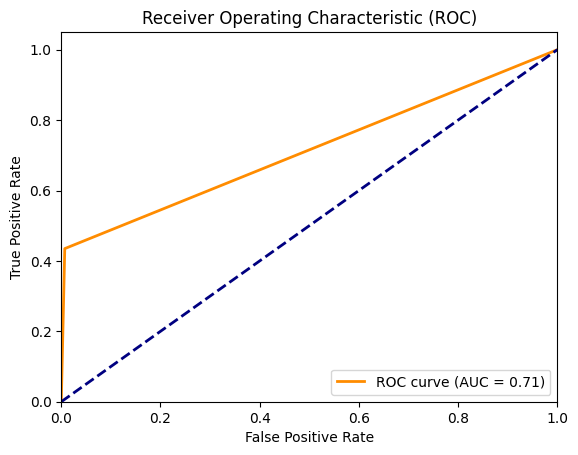

In [19]:
# Function to calculate ROC curve and AUC
def generate_roc_curve(valid_df, learner_inf, encode_category_types):
    preds = []
    for idx, row in tqdm(valid_df.iterrows(), total=len(valid_df)):
        resume = row['Resume_str']
        labels = learner_inf.blurr_predict(resume)[0]['labels']
        pred_Category = [0] * len(encode_category_types)
        for label in labels:
            pred_Category[encode_category_types[label]] = 1
        preds.append(pred_Category)

    # Convert to numpy arrays
    targets = np.array([np.asarray(target) for target in valid_df['category_cat_list'].to_list()])
    outputs = np.array([np.asarray(pred) for pred in preds])

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(targets.ravel(), outputs.ravel())
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

# Call the function to generate ROC curve
generate_roc_curve(valid_df, learner_inf, encode_category_types)
